In [38]:
import sympy
import math as m
import scipy
import numpy as np
from matplotlib import pyplot as plt 
from matplotlib import cm

In [39]:
df= lambda x: np.array([2*x[0], 2*x[1]])
f= lambda x: -(x[1] + 47)*m.sin(m.sqrt(abs(x[0]/2 +(x[1] + 47)))) - x[0]*m.sin(m.sqrt(abs(x[0] - (x[1] + 47))))
x= np.array([[100], [100]])

def pr(x, step:float =0.01):
    df_dx1_ = f(x)
    x[0] = x[0]+step
    df_dx1_p = f(x)
    x[0] = x[0]-step
    df_dx2_ = f(x)
    x[1] = x[1]+step
    df_dx2_p = f(x)
    x[1] = x[1]-step
    arr = np.array([(df_dx1_p-df_dx1_)/step, (df_dx2_p-df_dx2_)/step])
    return arr
print (m.sin(1))

0.8414709848078965


In [40]:
def grad(df, x:np.ndarray, step:float = 0.1, q:float = 1e-9):
    mas=np.array(x)
    pul=np.array([f(x)])
    while True:
        x = x - step*pr(x)
        mas= np.append(mas, x, axis=1)
        pul= np.append(pul, f(x))
        if (np.linalg.norm(pr(x)) <= q):
            break
    return mas, pul    

In [45]:
a, z= grad(df, x)

print (z)

def fun(x,y):
    return -(y + 47)* m.sin(m.sqrt(abs(x/2 +(y + 47)))) - x*m.sin(m.sqrt(abs(x - (y + 47))))

[-194.93880537 -191.60437659 -200.30416328 ... -250.65142232 -250.65142232
 -250.65142232]


TypeError: only size-1 arrays can be converted to Python scalars

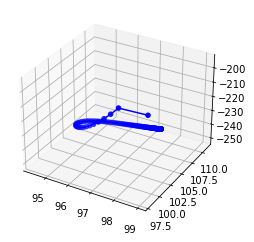

In [44]:
from mpl_toolkits.mplot3d import axes3d, Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(a[0], a[1], z, color = 'b')
ax.scatter(a[0], a[1], z, color ='b')

X,Y = np.meshgrid(a[0], a[1])
ax.plot_surface(X,Y,fun(X,Y),cmap=cm.hot)

plt.show()